# Lesson: Probability, Generalization, and Inference

## Quick Python Review

Write functions to create reusable code:

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def z_score(data_mean: float, data_length: int, null_mean: float) -> float:
    """
    Return the Z-score (standardized statistic) given mean of the data,
      length of the data, and the mean of the null hypothesis.
      Higher Z-scores (greater than 2.0) indicate a more likely 
      significance of the alternative hypothesis.
    """
    null_std = np.sqrt(null_mean * (1 - null_mean) / data_length)
    z_1 = (data_mean - null_mean) / null_std
    return z_1

In [14]:
print(f'Z-score where null_mean == data_mean: {z_score(0.5, 100, 0.5)}')
print(f'Z-score where null_mean != data_mean: {z_score(0.7, 100, 0.5)}')

Z-score where null_mean == data_mean: 0.0
Z-score where null_mean != data_mean: 3.999999999999999


## Bayes' Theorem (PA 3.5.1)

Relates the probability of event $A$ given a condition $B$ to the probability of the condition $B$ given that the event $A$ occurred.  Enables $P(B|A)$ to be calculated from $P(A|B)$.

$P(A|B) = \frac{P(B|A) P(A)}{P(B)} = \frac{P(B|A) P(A)}{P(B|A) P(A) + P(B|\bar{A}) P(\bar{A})}$

Let's practice writing a function for Bayes' Theorem and test it using the following example:

Suppose that $1$ out of every $1000$ computer chips produced by a chip manufacturer has a defect. The manufacturer has developed a method to test the chips, but the test is not perfect. If the chip has a defect, the test will correctly discover the defect with probability $0.96$. If the chip does not have a defect, the test will incorrectly report that the chip has a defect with probability $0.02$.

Let $D$ be the event that a chip is defective. Let $T$ be the event that a test indicates a defect. If a particular test indicates a defect, what is the probability that the chip is actually defective?

What parameters should our function have?

In [20]:
"""
Looking for P(D|T) (true positive probability).

P(D) = 1/1000
P(T|D) = 0.96
P(T|~D) = 0.02

P(~D) = 1 - P(D)
P(D|T) = {P(T|D) * P(D)} / {P(T|D) * P(D) + P(T|~D) * P(~D)}
"""


def bayes_theorem(prob_A: float, prob_B_given_A: float, prob_B_given_not_A: float) -> float:
    """
    Calculate P(A|B) given P(A), P(B|A), and P(B|~A) using Bayes' Theorem.
    """
    prob_not_A = 1 - prob_A
    top_fraction = prob_B_given_A * prob_A
    bottom_fraction = (prob_B_given_A * prob_A) + (prob_B_given_not_A * prob_not_A)
    prob_A_given_B = top_fraction / bottom_fraction
    return prob_A_given_B


bayes_theorem(1/1000, 0.96, 0.02)

0.045845272206303724

## Random Variables

Continuous random variables: measurements that are real numbers.

Discrete random variable: countable number of distinct integral values.

### Mean of discrete random variable
The mean (expected value) of discrete random variable $X$ is defined as: $\mu = E(X) = \sum(X \cdot p(X))$.

Let's make a function that accepts a dataframe with columns $X$ and $p(X)$ and returns the mean. 

In [21]:
def discrete_rv_mean(series_X: pd.Series, series_pX: pd.Series) -> float:
    """
    Given series of series_X and series_pX representing
      columns X and p(X), calculate the mean assuming a
      discrete random variable X.
    """
    mean = np.sum(series_X * series_pX)
    return mean

Now, let's use it to solve the following problem:

Grace earns money testing websites. Let $X$ represent Grace's weekly earnings. Given the amount of time Grace has available to work each week, Grace estimates that the probability of earning \\$0 a week is 20\%, of \\$100 is 70\%, and of \\$150 is 10\%. What is the mean of $X$?

In [40]:
weekly_earnings = {
    "X": [0, 100, 150],
    "pX": [0.2, 0.7, 0.1]
}

# for key, value in weekly_earnings.items():
#     print(f'key: {key}')
#     print(f'value: {value}')

df_weekly_earnings = pd.DataFrame.from_dict(weekly_earnings)

df_weekly_earnings.head()

,X,pX
0,0,0.2
1,100,0.7
2,150,0.1


In [41]:
discrete_rv_mean(df_weekly_earnings['X'], df_weekly_earnings['pX'])

85.0

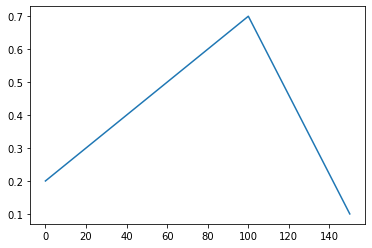

In [42]:
plt.plot(df_weekly_earnings['X'], df_weekly_earnings['pX'])

### Variance and standard deviation of a discrete random variable

Variance: $\sigma^2 = V(X) = \sum((x - \mu)^2 \cdot p(x))$

Standard deviation: $\sigma = \sqrt{\sigma^2}$

Write a function that calls your previous function of calculating $\mu$ to find $\sigma$, again based on a dataframe that accepts columns $X$ and $p(X)$:

In [43]:
def discrete_rv_variance(series_X: pd.Series, series_pX: pd.Series) -> float:
    """
    Given series of series_X and series_pX representing
      columns X and p(X), calculate the variance assuming a
      discrete random variable X.
    """
    mu = discrete_rv_mean(series_X, series_pX)
    variance = np.sum(np.square(series_X - mu) * series_pX)
    return variance


def discrete_rv_stdev(series_X: pd.Series, series_pX: pd.Series) -> float:
    """
    Given series of series_X and series_pX representing
      columns X and p(X), calculate the std. dev. assuming a
      discrete random variable X.
    """
    stdev = np.sqrt(discrete_rv_variance(series_X, series_pX))
    return stdev

Now, test it using the problem above regarding Grace the website tester:

In [44]:
discrete_rv_variance(df_weekly_earnings['X'], df_weekly_earnings['pX'])

2025.0

In [45]:
discrete_rv_stdev(df_weekly_earnings['X'], df_weekly_earnings['pX'])

45.0

### Using `scipy.stats` instead of writing your own functions

You can actually just use `rv_discrete` objects in the `scipy.stats` library to represent discrete random variables (likewise `rv_continuous` for continuous random variables).  Here's the above examples using `rv_discrete`'s `mean()`, `var()`, and `std()` functions.

## Checking distributions in `scipy.stats`

Once you finally have data from your physical model, one way to start building statistical models is to select a distribution closest to the data, given parameter values.  The shape, mean, variance, and standard deviation of your measurements (or counts) will fit some type of distribution.

The `scipy.stats` library has many distributions available (continuous, multivariate, and discrete) for you to help statistically model your problem at hand.

## Next time

We'll cover continuous random variables, which are generally much more interesting for us, since we can apply them almost everywhere in data-driven engineering.